In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import decomposition
import pickle
from sklearn.preprocessing import StandardScaler

def catch_df_get(path=''):
    catch_df=pd.read_csv(path)
    options=np.arange(500,1500)
    catch_df =catch_df.loc[catch_df['id_ves'].isin(options)]
    catch_df.sort_values(by='id_ves')
    return catch_df

catch_df=catch_df_get(r'C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет/db1/catch.csv')

def product_df_get(path=''):
    product_df=pd.read_csv(path)
    options=np.arange(500,1500)
    product_df =product_df.loc[product_df['id_ves'].isin(options)]
    product_df.sort_values(by='id_ves')
    return product_df

product_df=product_df_get(r'C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет/db1/product.csv')

#получим сводную таблицу db1 из 1 и 2
db1=catch_df.merge(product_df,how='inner')
db1.drop(columns='date',inplace=True)
db1

def ext_df_get(path=''):
    Ext_df=pd.read_csv(path,error_bad_lines=False,engine='python',sep=',')
    Ext_df=Ext_df.drop(['Name_Plat','Product_period','Region_Plat',"numPart"],axis='columns')
    options=np.arange(500,1500)
    Ext_df=Ext_df.loc[Ext_df['id_ves'].isin(options)]
    return Ext_df


ext_df=ext_df_get(r"C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет/db2/Ext.csv")

def ext2_df_get(path=''):
    Ext_df2=pd.read_csv(path, error_bad_lines=False, engine ='python', sep=',')
    Ext_df2=Ext_df2.drop(['unit'],axis='columns')
    return Ext_df2

ext_df2=ext2_df_get(r"C:/Users/Jora/Desktop/cifra_2022.05.26/Датасет/db2/Ext2.csv")

#получаем таблицу 2 из 3 и 4
db2=ext_df.merge(ext_df2,how='inner',left_on='id_vsd',right_on='id_vsd')
db2.drop(columns=['date_fishery','fish','date_vsd'],inplace=True)
db2

##слияние базы 1 и 2 и выборка данных случайная
data=pd.merge(db1,db2,how='inner')
data=data.sample(frac=0.01)
data

data['id_fish'] = [str(x).replace(',', '.') for x in data['id_fish']]
data['if_fish'] = data['id_fish'].astype(float)
data['prod_volume'] = [str(x).replace(',', '.') for x in data['prod_volume']]
data['prod_volume'] = data['prod_volume'].astype(float)*1000
data['prod_board_volume'] = [str(x).replace(',', '.') for x in data['prod_board_volume']]
data['prod_board_volume'] = data['prod_board_volume'].astype(float)*1000
data['catch_volume'] = [str(x).replace(',', '.') for x in data['catch_volume']]
data['catch_volume'] = data['catch_volume'].astype(float)*1000
data['if_fish'] = [str(x).replace(',', '.') for x in data['if_fish']]
data['if_fish'] = data['if_fish'].astype(float)
data.drop(['if_fish','id_fish'],axis=1,inplace=True)
data

<ipython-input-1-6a5928377f00>:53: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Ext_df=pd.read_csv(path,error_bad_lines=False,engine='python',sep=',')
<ipython-input-1-6a5928377f00>:63: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Ext_df2=pd.read_csv(path, error_bad_lines=False, engine ='python', sep=',')


,id_ves,id_region,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,id_Plat,id_vsd,num_vsd,volume
5263435,1284,108,13476.445,15,1829,1047,1,1173,95.00,2705.00,6294909,9048511,5295275,1003
14189198,1438,207,25354.000,15,2891,979,1,4869,1575.00,2740.00,6293359,8361181,3696130,18653
12946959,1460,207,264.000,97,2973,1269,1,2640,229.00,1090.00,6289435,8806786,4080459,229
2006148,1496,207,1309.000,15,2405,1096,1,3633,141.00,5225.00,6290072,9185632,5809368,975
17697036,1396,265,528.000,12,2583,1228,1,4213,0.00,1603.00,6293978,7093432,3764685,40580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540361,1340,108,8750.000,15,2134,1160,1,2640,58.63,1230.25,6290315,8817968,3932250,7576
14028999,1290,206,173.000,97,1920,1156,1,6028,776.00,4412.00,6296848,8126335,5371302,831
20442004,1306,207,12174.000,15,2051,1234,1,5326,0.00,156.00,6290197,7872184,5267397,17712
6095399,1328,473,8196.000,15,2856,1144,1,4281,0.00,124.00,6289155,9347823,5798414,18021


<AxesSubplot:>

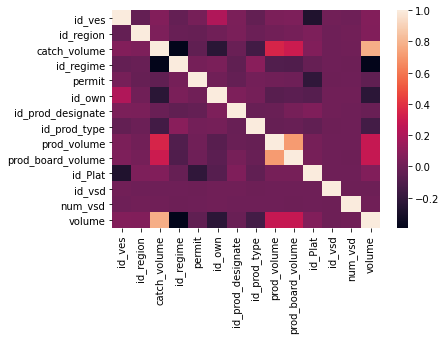

In [2]:
sns.heatmap(data.corr())

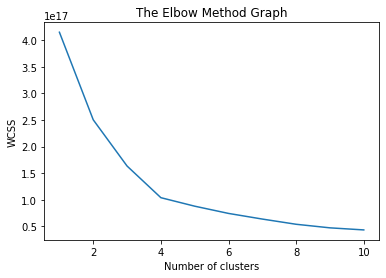

In [3]:

X=data

 
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


kmeans = KMeans(n_clusters=4, init ='k-means++',max_iter=300,n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(X)



In [4]:
data['class']=y_kmeans
data['class'].value_counts()
data

,id_ves,id_region,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,id_Plat,id_vsd,num_vsd,volume,class
5263435,1284,108,13476.445,15,1829,1047,1,1173,95.00,2705.00,6294909,9048511,5295275,1003,0
14189198,1438,207,25354.000,15,2891,979,1,4869,1575.00,2740.00,6293359,8361181,3696130,18653,2
12946959,1460,207,264.000,97,2973,1269,1,2640,229.00,1090.00,6289435,8806786,4080459,229,2
2006148,1496,207,1309.000,15,2405,1096,1,3633,141.00,5225.00,6290072,9185632,5809368,975,0
17697036,1396,265,528.000,12,2583,1228,1,4213,0.00,1603.00,6293978,7093432,3764685,40580,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540361,1340,108,8750.000,15,2134,1160,1,2640,58.63,1230.25,6290315,8817968,3932250,7576,2
14028999,1290,206,173.000,97,1920,1156,1,6028,776.00,4412.00,6296848,8126335,5371302,831,0
20442004,1306,207,12174.000,15,2051,1234,1,5326,0.00,156.00,6290197,7872184,5267397,17712,3
6095399,1328,473,8196.000,15,2856,1144,1,4281,0.00,124.00,6289155,9347823,5798414,18021,0


In [5]:
#Разбиение на обучающуюся и тренировочную
X=data.iloc[:,0:14]
y=data["class"]

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
X

,id_ves,id_region,catch_volume,id_regime,permit,id_own,id_prod_designate,id_prod_type,prod_volume,prod_board_volume,id_Plat,id_vsd,num_vsd,volume
5263435,1284,108,13476.445,15,1829,1047,1,1173,95.00,2705.00,6294909,9048511,5295275,1003
14189198,1438,207,25354.000,15,2891,979,1,4869,1575.00,2740.00,6293359,8361181,3696130,18653
12946959,1460,207,264.000,97,2973,1269,1,2640,229.00,1090.00,6289435,8806786,4080459,229
2006148,1496,207,1309.000,15,2405,1096,1,3633,141.00,5225.00,6290072,9185632,5809368,975
17697036,1396,265,528.000,12,2583,1228,1,4213,0.00,1603.00,6293978,7093432,3764685,40580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540361,1340,108,8750.000,15,2134,1160,1,2640,58.63,1230.25,6290315,8817968,3932250,7576
14028999,1290,206,173.000,97,1920,1156,1,6028,776.00,4412.00,6296848,8126335,5371302,831
20442004,1306,207,12174.000,15,2051,1234,1,5326,0.00,156.00,6290197,7872184,5267397,17712
6095399,1328,473,8196.000,15,2856,1144,1,4281,0.00,124.00,6289155,9347823,5798414,18021


In [6]:
lr = LogisticRegression();
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion="entropy")
knc = KNeighborsClassifier(n_neighbors=1)
 
# creating base classifiers
base_methods=[('LogisticReg', lr), 
       ('GaussianNB', gnb), 
       ('DecisionTree',dtc),   
       ('KNeighbors',knc)]

# hard voting method
vote_model=VotingClassifier(estimators=base_methods)
vote_model=vote_model.fit(X_train_scaled,y_train)
y_test_pred=vote_model.predict(X_test)
print(vote_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_test_pred)) 

# check performance of each classifier
for name,method in base_methods:
    method.fit(X_train_scaled, y_train)
    ypred=method.predict(X_train_scaled)
    acc=method.score(X_test_scaled, y_test)
    print(name, "Accuracy:", acc)

# soft voting method
vote_model=VotingClassifier(estimators=base_methods, 
       voting='soft',
       weights=[1,2,1,2])
vote_model=vote_model.fit(X_train_scaled,y_train)
ytest_pred=vote_model.predict(X_test)
print(vote_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_test_pred)) 

C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2510697618037457
[[20712     0     0     0]
 [20691     0     0     0]
 [20544     0     0     0]
 [20548     0     0     0]]


C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticReg Accuracy: 0.9974301472816535
GaussianNB Accuracy: 0.9725801563731136
DecisionTree Accuracy: 0.9999757561064307
KNeighbors Accuracy: 0.9759864234196012


C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2510697618037457
[[20712     0     0     0]
 [20691     0     0     0]
 [20544     0     0     0]
 [20548     0     0     0]]


In [7]:
pkl_filename1 = "hard_model.pkl"
with open(pkl_filename1, 'wb') as file:
    pickle.dump(vote_model, file)

In [8]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SGDClassifier(max_iter=1000, loss='log')
clf4= RandomForestClassifier()
clf5=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[ ('lr', clf1), ('kn', clf2),('sgd', clf3),('rfc',clf4),('GB',clf5)],voting='hard') # задаем метод голосования через большинство (hard voting)

params = {'lr__C' : [0.5,1,1.5]} 
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid = grid.fit(X_train_scaled, y_train) # когда задали все условия, проводим обучение и оптимизацию на 5 фолдах на собранной обучающий выборке 

C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
for clf, label in zip([clf1, clf2, clf3,clf4,clf5 ,eclf], ['Logistic Regression', 'KNeiighboors', 'SGD', 'RandomForest','GB','Ensemble_hardVoting']):
    scores = cross_val_score(clf, X_test, y_test, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [KNeiighboors]
Accuracy: 0.82 (+/- 0.02) [SGD]
Accuracy: 1.00 (+/- 0.00) [RandomForest]
Accuracy: 1.00 (+/- 0.00) [GB]


C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy: 1.00 (+/- 0.00) [Ensemble_hardVoting]


In [10]:
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(),label))

Accuracy: 1.00 (+/- 0.00) [Ensemble_hardVoting]


In [11]:
pkl_filename2 = "soft_model.pkl"
with open(pkl_filename2, 'wb') as file:
    pickle.dump(grid, file)

### Кластеризация и разметка
